Sentiment Analysis with Logistic Regression Model
----

In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import time
import nltk
import sentiment_utils as sutils
# USE_COUNT_VECTORIZER = False
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/acehunter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/acehunter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# define constants for the files we are using
TRAIN_FILE = "Book1.txt"
DEV_FILE = "test.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)
# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

In [3]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.
vocab = sutils.create_index(train_tups[0])


In [4]:
# how much time does it take to featurize the all data with your implementation?

# YOUR CODE HERE
def count_vocab(data: list):
    custom_vocab = set()
    for review in featurized_train_multi_data:
        for word in review.keys():
            custom_vocab.add(word)
    return len(custom_vocab)

start = time.time()

featurized_train_bi_data = sutils.featurize(vocab, train_tups[0], True)
end = time.time()
print("Time taken for binary featurisation of training data:", end - start, "seconds")

start = time.time()
featurized_train_multi_data = sutils.featurize(vocab, train_tups[0])
end = time.time()
print("Time taken for multinomial featurisation of training data:", end - start, "seconds")

print("Custom Training vocab size:", count_vocab(featurized_train_multi_data))

start = time.time()
featurized_dev_bi_data = sutils.featurize(vocab, dev_tups[0], True)
end = time.time()
print("Time taken for binary featurisation of dev data:", end - start, "seconds")

start = time.time()
featurized_dev_multi_data = sutils.featurize(vocab, dev_tups[0])
end = time.time()
print("Time taken for multinomial featurisation of dev data:", end - start, "seconds")

print("Custom Dev vocab size:", count_vocab(featurized_dev_multi_data))


Time taken for binary featurisation of training data: 23.04201102256775 seconds
Time taken for multinomial featurisation of training data: 31.728981018066406 seconds
Custom Training vocab size: 15228
Time taken for binary featurisation of dev data: 3.0762507915496826 seconds
Time taken for multinomial featurisation of dev data: 4.004119873046875 seconds
Custom Dev vocab size: 15228


In [5]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?
# YOUR CODE HERE
train_reviews = [" ".join(review) for review in train_tups[0]]
dev_reviews = [" ".join(review) for review in dev_tups[0]]

vectorizer_mul = CountVectorizer(tokenizer=None, preprocessor=None, stop_words=None, vocabulary=vocab)
vectorizer_vocab_multi = set(vectorizer_mul.get_feature_names_out())
print("Count Vectorizer vocab size:", len(vectorizer_vocab_multi))

start = time.time()

X_train_multi = vectorizer_mul.fit_transform(train_reviews)
X_dev_multi = vectorizer_mul.transform(dev_reviews)

end = time.time()
print("Time taken to multinomial featurize training data with Count Vectorization:", end - start, "seconds")


vectorizer_bin = CountVectorizer(binary=True, tokenizer=None, preprocessor=None, stop_words=None, vocabulary=vocab)
vectorizer_vocab_bin = set(vectorizer_bin.get_feature_names_out())
print("Count Vectorizer vocab size:", len(vectorizer_vocab_bin))

start = time.time()
X_train_bin = vectorizer_bin.fit_transform(train_reviews)
X_dev_bin = vectorizer_bin.transform(dev_reviews)
end = time.time()
print("Time taken to binary featurize training data with Count Vectorization:", end - start, "seconds")


Count Vectorizer vocab size: 15228
Time taken to multinomial featurize training data with Count Vectorization: 0.1881711483001709 seconds
Count Vectorizer vocab size: 15228
Time taken to binary featurize training data with Count Vectorization: 0.18627715110778809 seconds


1. How big is your vocabulary using your vectorization function(s)? __19357__
2. How big is your vocabulary using the `CountVectorizer`? __19357__

In [6]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

import numpy as np
from scipy.sparse import csr_matrix

# count vector binary
sparsity_train_bin_cv = 1 - (X_train_bin.nnz / (X_train_bin.shape[0] * X_train_bin.shape[1]))
sparsity_dev_bin_cv = 1 - (X_dev_bin.nnz / (X_dev_bin.shape[0] * X_dev_bin.shape[1]))
# Print out the sparsity of the vectorized data
print("Count vector binary -")
print("Sparsity of Training Data:", sparsity_train_bin_cv)
print("Sparsity of Dev Data:", sparsity_dev_bin_cv)

# count vector multinomial
sparsity_train_multi_cv = 1 - (X_train_multi.nnz / (X_train_multi.shape[0] * X_train_multi.shape[1]))
sparsity_dev_multi_cv = 1 - (X_dev_multi.nnz / (X_dev_multi.shape[0] * X_dev_multi.shape[1]))
# Print out the sparsity of the vectorized data
print("Count vector multinomial -")
print("Sparsity of Training Data:", sparsity_train_multi_cv)
print("Sparsity of Dev Data:", sparsity_dev_multi_cv)

# # custom vector multinomial
# sparsity_train_multi_custom = 1 - (featurized_train_multi_data.nnz / (featurized_train_multi_data.shape[0] * featurized_train_multi_data.shape[1]))
# sparsity_dev_multi_custom = 1 - (featurized_dev_multi_data.nnz / (featurized_dev_multi_data.shape[0] * featurized_dev_multi_data.shape[1]))
# # Print out the sparsity of the vectorized data
# print("Custom vector multinomial -")
# print("Sparsity of Training Data:", sparsity_train_multi_custom)
# print("Sparsity of Dev Data:", sparsity_dev_multi_custom)

# # custom vector binary
# sparsity_train_bi_custom = 1 - (featurized_train_bi_data.nnz / (featurized_train_bi_data.shape[0] * featurized_train_bi_data.shape[1]))
# sparsity_dev_bi_custom = 1 - (featurized_dev_bi_data.nnz / (featurized_dev_bi_data.shape[0] * featurized_dev_bi_data.shape[1]))
# # Print out the sparsity of the vectorized data
# print("Custom vector binary -")
# print("Sparsity of Training Data:", sparsity_train_bi_custom)
# print("Sparsity of Dev Data:", sparsity_dev_bi_custom)




Count vector binary -
Sparsity of Training Data: 0.9992544645994822
Sparsity of Dev Data: 0.9993041448062954
Count vector multinomial -
Sparsity of Training Data: 0.9992544645994822
Sparsity of Dev Data: 0.9993041448062954


In [7]:
from scipy.sparse.csgraph._min_spanning_tree import csr_matrix
import numpy as np

# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

train_labels = train_tups[1]
dev_labels = dev_tups[1]
featurized_train_bi_data_numeric = []

for features in featurized_train_bi_data:
    feature_vector = [features.get(word, 0) for word in vocab]
    featurized_train_bi_data_numeric.append(feature_vector)

featurized_train_multi_data_numeric = []

for features in featurized_train_multi_data:
    feature_vector = [features.get(word, 0) for word in vocab]
    featurized_train_multi_data_numeric.append(feature_vector)

featurized_dev_bi_data_numerized = []

for features in featurized_dev_bi_data:
    feature_vector = [features.get(word, 0) for word in vocab]
    featurized_dev_bi_data_numerized.append(feature_vector)

featurized_dev_multi_data_numerized = []

for features in featurized_dev_multi_data:
    feature_vector = [features.get(word, 0) for word in vocab]
    featurized_dev_multi_data_numerized.append(feature_vector)

def logistic_regression_classifier(X_train, train_labels):
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, train_labels)
    return lr_model



# Make a prediction

# cv classification
lr_model_cv_bin = logistic_regression_classifier(X_train_bin, train_labels)
lr_model_cv_multi = logistic_regression_classifier(X_train_multi, train_labels)

# custom classification
lr_model_custom_bin = logistic_regression_classifier(featurized_train_bi_data_numeric, train_labels)
lr_model_custom_multi = logistic_regression_classifier(featurized_train_multi_data_numeric, train_labels)

# cv binary prediction
start = time.time()
predicted_label_binary = lr_model_cv_bin.predict(X_dev_bin[1])
end = time.time()
print(f"elapsed time for cv binary classification: {end - start}")
print(f"Binary Review: {' '.join(dev_tups[0][1])}")
print(f"Binary Predicted Label: {predicted_label_binary}")
print("------")


# cv multinomial prediction
start = time.time()
predicted_label_multi = lr_model_cv_multi.predict(X_dev_multi[4])
end = time.time()
print(f"elapsed time for cv multinomial classification: {end - start}")
print(f"Multinomial Review: {' '.join(dev_tups[0][4])}")
print(f"Multinomial Predicted Label: {predicted_label_multi}")
print("------")

# custom binary prediction
input_data_bin = featurized_dev_bi_data_numerized[1]
input_data_bin = np.reshape(input_data_bin, (1, -1))
start = time.time()
predicted_label_binary = lr_model_custom_bin.predict(input_data_bin)
end = time.time()
print(f"elapsed time for custom binary classification: {end - start}")
print(f"Binary Review: {' '.join(dev_tups[0][1])}")
print(f"Binary Predicted Label: {predicted_label_binary}")
print("------")


# custom multinomial prediction
input_data_mul = featurized_dev_multi_data_numerized[1]
input_data_mul = np.reshape(input_data_mul, (1, -1))
start = time.time()
predicted_label_multi = lr_model_custom_multi.predict(input_data_mul)
end = time.time()
print(f"elapsed time for custom multinomial classification: {end - start}")
print(f"Multinomial Review: {' '.join(dev_tups[0][1])}")
print(f"Multinomial Predicted Label: {predicted_label_multi}")
print("------")


elapsed time for cv binary classification: 0.0009930133819580078
Binary Review: recession hit veronique branquinho she ha to quit her company such a shame
Binary Predicted Label: [0]
------
elapsed time for cv multinomial classification: 0.0009920597076416016
Multinomial Review: recession hit veronique branquinho she ha to quit her company such a shame
Multinomial Predicted Label: [0]
------
elapsed time for custom binary classification: 0.0010690689086914062
Binary Review: recession hit veronique branquinho she ha to quit her company such a shame
Binary Predicted Label: [0]
------
elapsed time for custom multinomial classification: 0.00040221214294433594
Multinomial Review: recession hit veronique branquinho she ha to quit her company such a shame
Multinomial Predicted Label: [0]
------


Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: __0.7850__
- CountVectorizer features, multinomial: __0.7830__
- your vectorized features, binarized: __0.8037__
- CountVectorizer features, binarized: __0.7981__

Produce your graph(s) for the combination with the best final f1 score.




Precision: 0.9083
Recall: 0.8713
F1 Score: 0.8894
Accuracy: 0.8864
Precision: 0.9057
Recall: 0.8713
F1 Score: 0.8882
Accuracy: 0.8850
Precision: 0.9072
Recall: 0.8776
F1 Score: 0.8922
Accuracy: 0.8888
Precision: 0.9096
Recall: 0.8758
F1 Score: 0.8924
Accuracy: 0.8893


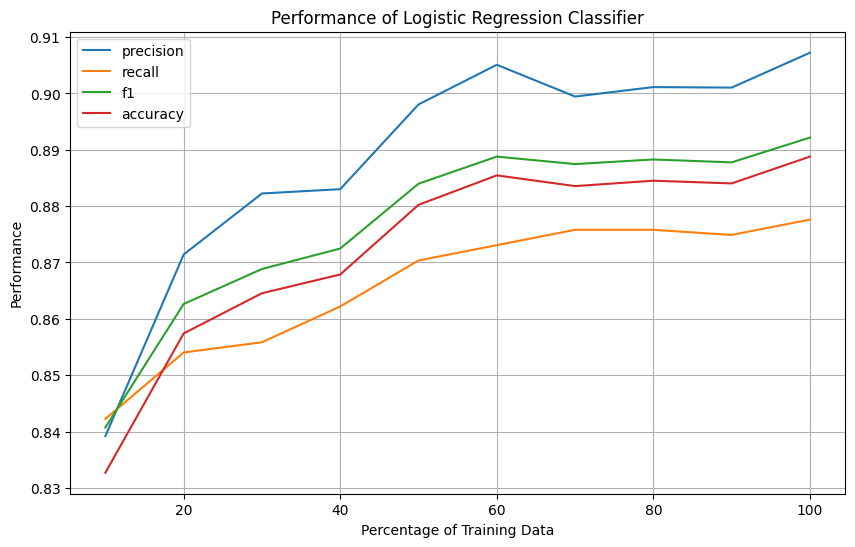

elapsed time for graph: Custom featurize - binary: 182.11304187774658


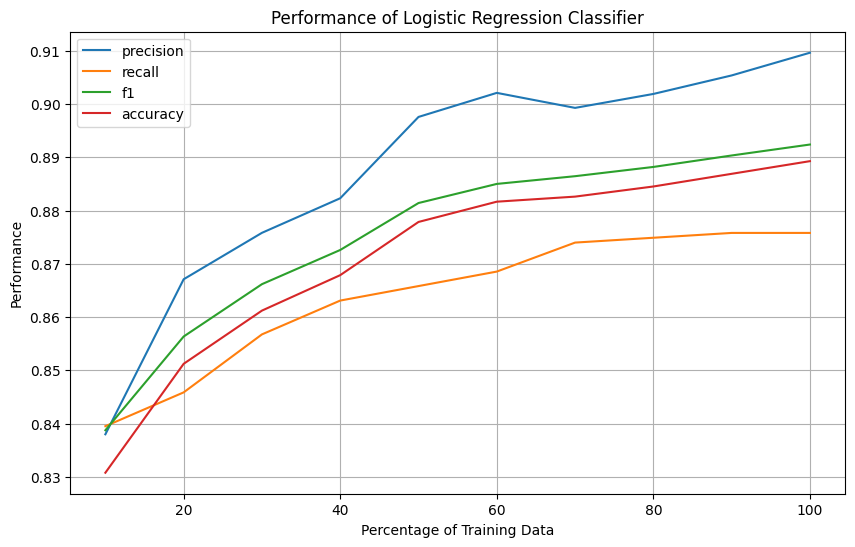

elapsed time for graph: Custom featurize - multinomial: 213.39297890663147


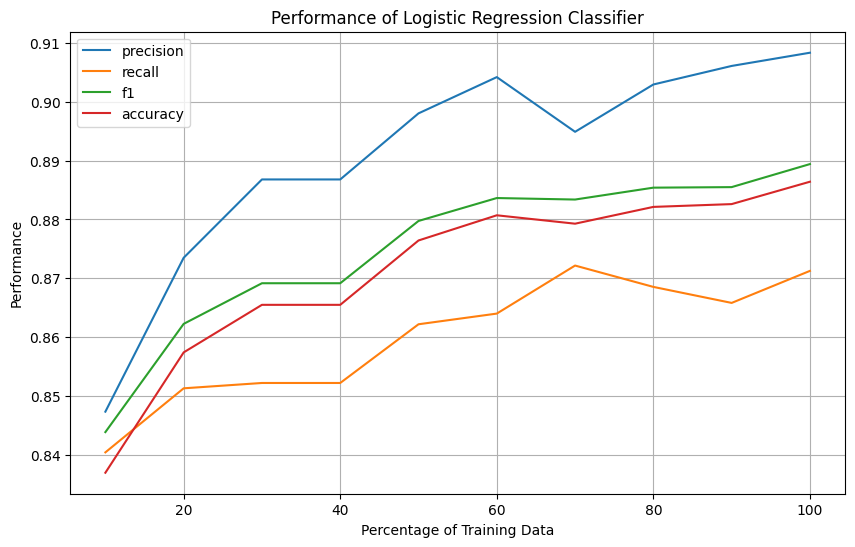

elapsed time for graph: Count Vector featurize - binary: 106.59341502189636


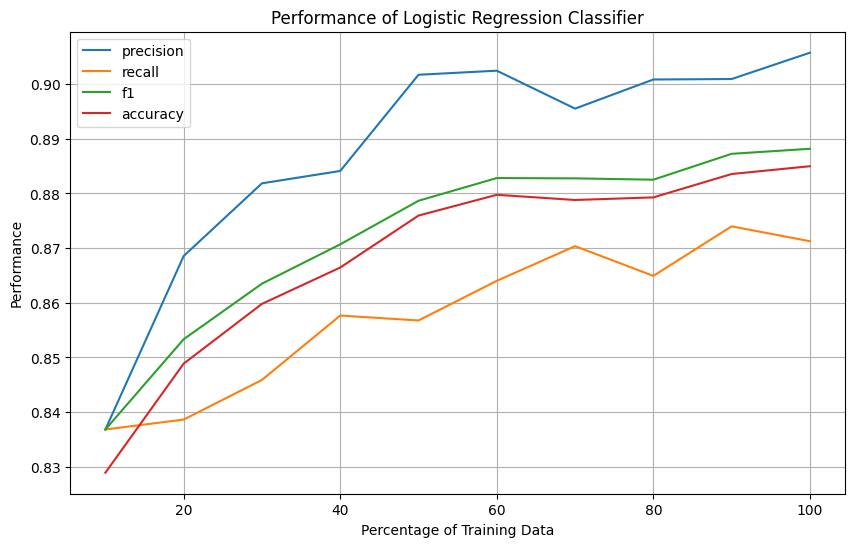

elapsed time for graph: Count Vector featurize - multinomial: 120.89944791793823


In [8]:

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# takes approx 30 sec on Felix's computer

predicted_labels_bin = lr_model_cv_bin.predict(X_dev_bin)
predicted_labels_multi = lr_model_cv_multi.predict(X_dev_multi)
predicted_labels_bin_custom = lr_model_custom_bin.predict(featurized_dev_bi_data_numerized)
predicted_labels_multi_custom = lr_model_custom_multi.predict(featurized_dev_multi_data_numerized)

true_labels = dev_labels

precision_bin, recall_bin, f1_bin, accuracy_bin = sutils.get_prfa(true_labels, predicted_labels_bin, verbose=True)
precision_multi, recall_multi, f1_multi, accuracy_multi = sutils.get_prfa(true_labels, predicted_labels_multi, verbose=True)
precision_multi_c_bin, recall_multi_c_bin, f1_multi_c_bin, accuracy_multi_c_bin = sutils.get_prfa(true_labels, predicted_labels_bin_custom, verbose=True)
precision_multi_c_multi, recall_multi_c_multi, f1_multi_c_multi, accuracy_multi_c_multi = sutils.get_prfa(true_labels, predicted_labels_multi_custom, verbose=True)


# if f1_multi > f1_bin:
#     X_train = X_train_multi
#     X_dev = X_dev_multi
# else:
#     X_train = X_train_bin
#     X_dev = X_dev_bin

# Custom featurize - binary
start = time.time()
model_kind = 'Logistic Regression'

train_feats_bin_cus = list(zip(featurized_train_bi_data_numeric, train_labels))
dev_feats_bin_cus = featurized_dev_bi_data_numerized
sutils.create_training_graph(train_feats_bin_cus, train_tups, dev_feats_bin_cus, dev_labels, model_kind, 'lr-binary')
end = time.time()
elapsed_time = end - start
print(f"elapsed time for graph: Custom featurize - binary: {elapsed_time}")

# Custom featurize - multinomial
start = time.time()
train_feats_multi_cus = list(zip(featurized_train_multi_data_numeric, train_labels))
dev_feats_multi_cus = featurized_dev_multi_data_numerized
sutils.create_training_graph(train_feats_multi_cus, train_tups, dev_feats_multi_cus, dev_labels, model_kind, 'lr-multi')
end = time.time()
elapsed_time = end - start
print(f"elapsed time for graph: Custom featurize - multinomial: {elapsed_time}")

# Count Vector featurize - binary
start = time.time()
train_feats_bin_cv = list(zip(X_train_bin.toarray(), train_labels))
dev_feats_bin_cv = X_dev_bin
sutils.create_training_graph(train_feats_bin_cv, train_tups, dev_feats_bin_cv, dev_labels, model_kind, 'lr-cv-binary')
end = time.time()
elapsed_time = end - start
print(f"elapsed time for graph: Count Vector featurize - binary: {elapsed_time}")

# Count Vector featurize - multinomial
start = time.time()
train_feats_multi_cv = list(zip(X_train_multi.toarray(), train_labels))
dev_feats_multi_cv = X_dev_multi
sutils.create_training_graph(train_feats_multi_cv, train_tups, dev_feats_multi_cv, dev_labels, model_kind, 'lr-cv-multi')
end = time.time()
elapsed_time = end - start
print(f"elapsed time for graph: Count Vector featurize - multinomial: {elapsed_time}")


6120 REQUIRED
----

Find the top 100 most important features to your Logistic Regression classifier when using 100% of the training data. To access the weights of your model, you can access the `model.coef_` attribute. You'll want to use a `StandardScalar` preprocessor. This will help us deal with the fact that we expect counts of certain words to be higher (e.g. stop words).

To find the importance of a feature, calculate the absolute value of each weight in the model, then order your features according to the absolute values of these weights. The feature with the heighest absolute value weight has the most importance.

Use __your__ (not CountVectorizer) multinomial vectors for this analysis.

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert sparse vectors to dense arrays
train_data_array = [list(fv.values()) for fv in featurized_train_multi_data]

# Standardize the feature vectors
data_scaler = StandardScaler()
scaled_train_data = data_scaler.fit_transform(train_data_array)

# Fit a logistic regression model on the standardized inputs
lr_model = LogisticRegression()
lr_model.fit(scaled_train_data, train_labels)

# Calculate the absolute values of coefficients
abs_coefficients = np.abs(lr_model.coef_)

# Find the indices of the top 100 most important features
top_100_feature_indices = np.argsort(abs_coefficients.flatten())[-100:]

# Access the words associated with these top features
top_100_features = [vocab[i] for i in top_100_feature_indices]

print(top_100_features)

['older', 'orlando', 'will', 'sign', 'fantastic', 'freezing', 'lucky', 'train', 'pretty', 'excited', 'live', 'place', 'entire', 'upset', 'morning', 'is', 'hard', 'sit', 'real', 'worst', 'd', 'throat', 'lol', 'yum', 'horrible', 'stuck', 'yummy', 'ipod', 'lmao', 'special', 'whatever', 'track', 'thx', 'half', 'jealous', 'november', 'second', 'mother', 'showing', 'hoping', 'wish', 'lovely', 'loved', 'shame', 'missing', 'finally', 'exhausted', 'no', 'for', 'thought', 'wtf', 'welcome', 'ever', 'goodnight', 'congrats', 'fun', 'yay', 'stupid', 'sweet', 'how', 'sick', 'we', 'unfortunately', 'you', 'sorry', 'tho', 'wonderful', 'nice', 'amazing', 'beautiful', 'better', 'cute', 'great', 'lost', 'headache', 'wait', 'cool', 'poor', 'note', 'happy', 'star', 'not', 'feel', 'i', 'missed', 'tired', 'hopefully', 'thank', 'glad', 'suck', 'awesome', 't', 'hope', 'bored', 'miss', 'good', 'love', 'hate', 'thanks', 'sad']


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# print out the top 20 most informative features according to this model
# Combine feature names and weights into a list of tuples
abs_coefficients = np.abs(lr_model.coef_)
top_20_indices = np.argsort(abs_coefficients)[0][-20:]
for i in top_20_indices:
    print(f'Top Feature: {vocab[i]}')


Top Feature: star
Top Feature: not
Top Feature: feel
Top Feature: i
Top Feature: missed
Top Feature: tired
Top Feature: hopefully
Top Feature: thank
Top Feature: glad
Top Feature: suck
Top Feature: awesome
Top Feature: t
Top Feature: hope
Top Feature: bored
Top Feature: miss
Top Feature: good
Top Feature: love
Top Feature: hate
Top Feature: thanks
Top Feature: sad


In [12]:
# re-evalaute your LR model with inputs that have been filtered to only use the top 500 most informative features
# Re-evaluate your LR model with inputs filtered to use the top 500 most informative features
top_500_features_indices = np.argsort(abs_coefficients).flatten()[-500:]
train_filtered = scaled_train_data[:, top_500_features_indices]

# Convert dev data to a list of lists
def convert_to_list_of_lists(featurized_data, vocabulary):
    converted_data = []
    for document in featurized_data:
        feature_vector = [document.get(word, 0) for word in vocabulary]
        converted_data.append(feature_vector)
    return converted_data

dev_data_list = convert_to_list_of_lists(featurized_dev_multi_data, vocab)
scaled_dev_data = data_scaler.fit_transform(dev_data_list)

dev_filtered = scaled_dev_data[:, top_500_features_indices]
# Retrain a new LR model on the filtered training data
filtered_lr_model = LogisticRegression()
filtered_lr_model.fit(train_filtered, train_labels)

dev_predictions = filtered_lr_model.predict(dev_filtered)
print(dev_predictions)

[1 0 1 ... 0 1 1]


In [13]:
# create the same graph as before, but with the filtered inputs
dev_filtered.shape

(2104, 500)

In [14]:
train_filtered.shape

(16362, 500)

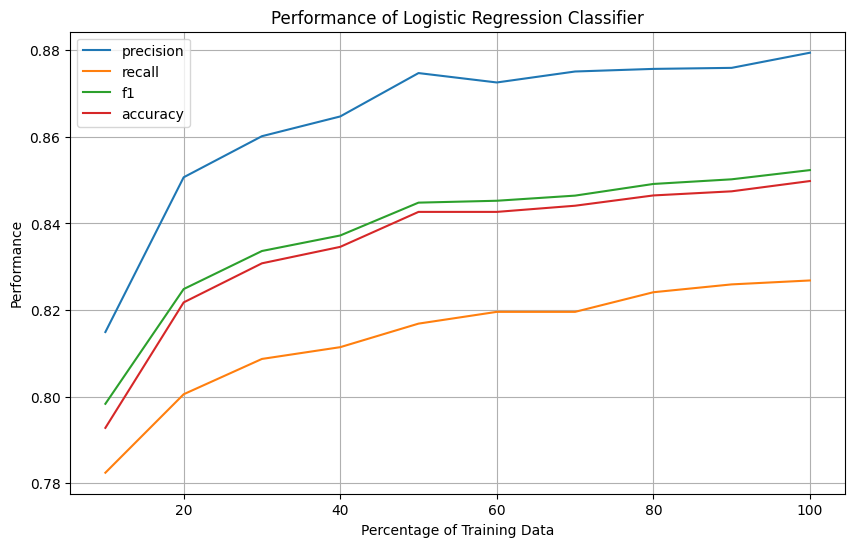

In [15]:
sutils.create_training_graph(list(zip(train_filtered, train_labels)), train_tups, dev_filtered, dev_labels, "Logistic Regression")